In [1]:
import sys
sys.path.append("../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),])

mnist_dset_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
# activation = F.relu
# architecture = [784, 128, 64, 10]
# lambda_ = 0.99999
# epsilon = 0.2
# supervised_lambda_weight = 1e-3
# neural_lr_start = 0.001 
# neural_lr_stop = 0.0005 
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.005
# neural_dynamic_iterations = 50


# activation = F.relu
# architecture = [784, 128, 64, 10]
# lambda_ = 0.99999
# epsilon = 0.01
# supervised_lambda_weight = 1e-3
# neural_lr_start = 0.5
# neural_lr_stop = 0.0 
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.005
# neural_dynamic_iterations = 50

# model = CorInfoMaxBiDirectionalNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
#                                       sgd_nesterov = False, optimizer_type = "sgd", 
#                                       optim_lr_ff = 1, optim_lr_fb = 1, stepLR_step_size = 10*3000,)



activation = hard_sigmoid
architecture = [784, 500, 10]
lambda_ = 0.999
epsilon = 0.5
supervised_lambda_weight = 1e0
neural_lr_start = 0.05 
neural_lr_stop = 0.0 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = CorInfoMaxBiDirectionalNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
                                      sgd_nesterov = False, optimizer_type = "sgd", 
                                      optim_lr_ff = 1e-2, optim_lr_fb = 3e-3, stepLR_step_size = 10*3000,)

In [ ]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 50

for epoch_ in range(n_epochs):
    Bcopy = torch.clone(model.B[0]["weight"])
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))
    print("B_1 update difference : {}".format(torch.norm(model.B[0]['weight'] - Bcopy)))

3000it [04:06, 12.15it/s]
2it [00:00, 13.07it/s]

Epoch : 1, Train Accuracy : 0.09871666666666666, Test Accuracy : 0.098
B_1 update difference : nan


1044it [01:25, 12.07it/s]

In [8]:
model.Wff[0]['bias'].grad

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

In [ ]:
plt.imshow(torch2numpy(model.B[0]['weight']))

In [ ]:
torch2numpy(model.B[0]['weight'])

In [ ]:
model.B.copy()

In [17]:
# activation = F.relu
# architecture = [784, 128, 64, 10]
# lambda_ = 0.9999
# epsilon = 0.01
# supervised_lambda_weight = 1e-3
# neural_lr_start = 0.001 
# neural_lr_stop = 0.0005 
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.005
# neural_dynamic_iterations = 50

# model = CorInfoMaxBiDirectionalNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
#                                       sgd_nesterov = False, optimizer_type = "sgd", 
#                                       optim_lr_ff = 1, optim_lr_fb = 0.1, stepLR_step_size = 10*3000,)

# activation = hard_sigmoid
# architecture = [784, 500, 10]
# lambda_ = 0.999
# epsilon = 0.5
# supervised_lambda_weight = 1e0
# neural_lr_start = 0.05 
# neural_lr_stop = 0.0 
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.005
# neural_dynamic_iterations = 50

# model = CorInfoMaxBiDirectionalNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
#                                       sgd_nesterov = False, sgd_weight_decay = 0.9, optimizer_type = "adam", 
#                                       optim_lr_ff = 1e-5, optim_lr_fb = 1e-6, stepLR_step_size = 10*3000,)

x, y = next(iter(train_loader))
x, y = x.to(device), y.to(device)
x = x.to(device).view(x.size(0),-1).T
y_one_hot = F.one_hot(y, 10).to(device).T

neurons = model.fast_forward(x, no_grad = True)
# for jj in range(len(neurons)):
#     neurons[jj] = neurons[jj].requires_grad_()
    
# layers = [x] + neurons

# layers_copy = model.copy_neurons(layers)
neurons = model.init_neurons(x.size(1))
neurons = model.run_neural_dynamics(x, y_one_hot, neurons, supervised_lambda_weight, 
                          neural_lr_start, neural_lr_stop, lr_rule = neural_lr_rule, 
                          lr_decay_multiplier = neural_lr_decay_multiplier, 
                          neural_dynamic_iterations = neural_dynamic_iterations)

corinfo_cost = model.CorInfo_Cost(x, y, neurons).sum()
corinfo_cost.backward()

print(torch.norm(model.Wff[0]['weight'].grad), torch.max(model.Wff[0]['weight'].grad))
print(torch.norm(model.Wff[1]['weight'].grad), torch.max(model.Wff[1]['weight'].grad))
# print(torch.norm(model.Wff[2]['weight'].grad), torch.max(model.Wff[2]['weight'].grad))

print(torch.norm(model.Wff[0]['bias'].grad), torch.max(model.Wff[0]['bias'].grad))
print(torch.norm(model.Wff[1]['bias'].grad), torch.max(model.Wff[1]['bias'].grad))
# print(torch.norm(model.Wff[2]['bias'].grad), torch.max(model.Wff[2]['bias'].grad))

print(torch.norm(model.Wfb[1]['weight'].grad), torch.max(model.Wfb[1]['weight'].grad))
# print(torch.norm(model.Wfb[2]['weight'].grad), torch.max(model.Wfb[2]['weight'].grad))

print(torch.norm(model.Wfb[1]['bias'].grad), torch.max(model.Wfb[1]['bias'].grad))
# print(torch.norm(model.Wfb[2]['bias'].grad), torch.max(model.Wfb[2]['bias'].grad))

tensor(11758.7998, device='cuda:0') tensor(187.5024, device='cuda:0')
tensor(747.5477, device='cuda:0') tensor(80.6627, device='cuda:0')
tensor(1832.9569, device='cuda:0') tensor(276.0520, device='cuda:0')
tensor(217.5564, device='cuda:0') tensor(141.6466, device='cuda:0')
tensor(593.2910, device='cuda:0') tensor(69.9065, device='cuda:0')
tensor(1553.1637, device='cuda:0') tensor(239.2898, device='cuda:0')


In [32]:
corinfo_cost

tensor(-5284.9814, device='cuda:0', grad_fn=<SumBackward0>)

In [33]:
torch.argmax(neurons[-1], 0), y

(tensor([5, 3, 6, 6, 5, 5, 6, 3, 9, 2, 5, 5, 7, 1, 5, 5, 2, 2, 6, 5],
        device='cuda:0'),
 tensor([7, 3, 6, 6, 3, 5, 4, 3, 9, 2, 0, 0, 7, 1, 0, 5, 2, 8, 6, 8],
        device='cuda:0'))

In [7]:
neurons

[tensor([[0.0663, 0.6125, 0.0069,  ..., 0.1602, 0.0000, 0.0541],
         [0.0831, 0.6594, 0.4553,  ..., 0.3719, 0.4073, 0.1651],
         [0.0312, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1214],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0453, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0363, 0.2779, 0.1765,  ..., 0.1260, 0.0226, 0.0021]],
        device='cuda:0', requires_grad=True),
 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0006, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0946, 0.1463, 0.1020,  ..., 0.0685, 0.1343, 0.1708],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1033, 0.1283, 0.1032,  ..., 0.1133, 0.1146, 0.0785],
         [0.0077, 0.0000, 0.0000,  ..., 0.0000, 0.1008, 0.0657]],
        device='cuda:0', requires_grad=True),
 tensor([[2.3724e-02, 1.0231e-01, 2.5106e-02, 1.0037e-01, 5.2609e-02, 3.9876e-02,
          4.5243

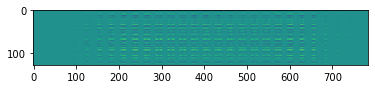

In [5]:
plt.imshow(torch2numpy((model.Wff[0]['weight'].grad)))

In [ ]:
mbs = x.size(1)
for jj in range(len(neurons)):
    neurons[jj] = neurons[jj].requires_grad_()
corinfo_cost = model.CorInfo_Cost(x, y, neurons)
init_grads = torch.tensor([1 for i in range(mbs)], dtype=torch.float, device=device, requires_grad=True) #Initializing gradients
grads = torch.autograd.grad(corinfo_cost, neurons, grad_outputs=init_grads, create_graph=False) # dPhi/ds

In [ ]:
one_over_epsilon = model.one_over_epsilon
gam_ = model.gam_

x, y = next(iter(train_loader))
x, y = x.to(device), y.to(device)
x = x.to(device).view(x.size(0),-1).T
y_one_hot = F.one_hot(y, 10).to(device).T

Wff = model.Wff
B = model.B

neurons = model.fast_forward(x, no_grad = True)

layers = [x] + neurons
for jj in range(len(Wff)):
    if jj == 0:
        error = - one_over_epsilon * (layers[jj + 1] - (Wff[jj]['weight'] @ layers[jj] + Wff[jj]['bias'])) 
    else:
        error = - one_over_epsilon * (layers[jj + 1] - (Wff[jj]['weight'] @ model.activation(layers[jj]) + Wff[jj]['bias']))

    lateral_term = gam_ * 0.5 * (layers[jj + 1].T @ B[jj]['weight'] @ layers[jj + 1])
    corinfo_cost = torch.sum(error * error, 0)
    


In [ ]:
error.shape
torch.sum(error * error, 0).shape

In [ ]:
outer_prod_broadcasting((B[jj]['weight'] @ layers[jj + 1]), layers[jj + 1].T).shape

In [ ]:
layers[jj + 1][:,2].T @ B[jj]['weight'] @ layers[jj + 1][:,2]

In [ ]:
torch.sum((B[jj]['weight'] @ layers[jj + 1]) * layers[jj + 1], 0)

In [ ]:
(B[jj]['weight'] @ layers[jj + 1]).shape, layers[jj + 1].shape

In [ ]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 50

for epoch_ in range(n_epochs):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))